In [1]:
import pandas as pd
df = pd.read_csv("Ott.csv")
df

,deceptive,hotel,polarity,source,text
0,truthful,conrad,positive,TripAdvisor,We stayed for a one night getaway with family ...
1,truthful,hyatt,positive,TripAdvisor,Triple A rate with upgrade to view room was le...
2,truthful,hyatt,positive,TripAdvisor,This comes a little late as I'm finally catchi...
3,truthful,omni,positive,TripAdvisor,The Omni Chicago really delivers on all fronts...
4,truthful,hyatt,positive,TripAdvisor,I asked for a high floor away from the elevato...
...,...,...,...,...,...
1595,deceptive,intercontinental,negative,MTurk,Problems started when I booked the InterContin...
1596,deceptive,amalfi,negative,MTurk,The Amalfi Hotel has a beautiful website and i...
1597,deceptive,intercontinental,negative,MTurk,The Intercontinental Chicago Magnificent Mile ...
1598,deceptive,palmer,negative,MTurk,"The Palmer House Hilton, while it looks good i..."


In [2]:
df['label'] = df.deceptive
df = df.drop(['hotel', 'source','deceptive','polarity'], axis = 1)
df

,text,label
0,We stayed for a one night getaway with family ...,truthful
1,Triple A rate with upgrade to view room was le...,truthful
2,This comes a little late as I'm finally catchi...,truthful
3,The Omni Chicago really delivers on all fronts...,truthful
4,I asked for a high floor away from the elevato...,truthful
...,...,...
1595,Problems started when I booked the InterContin...,deceptive
1596,The Amalfi Hotel has a beautiful website and i...,deceptive
1597,The Intercontinental Chicago Magnificent Mile ...,deceptive
1598,"The Palmer House Hilton, while it looks good i...",deceptive


In [3]:
df.label = df.label.replace({
    'truthful': 0,
    'deceptive': 1
})
df

,text,label
0,We stayed for a one night getaway with family ...,0
1,Triple A rate with upgrade to view room was le...,0
2,This comes a little late as I'm finally catchi...,0
3,The Omni Chicago really delivers on all fronts...,0
4,I asked for a high floor away from the elevato...,0
...,...,...
1595,Problems started when I booked the InterContin...,1
1596,The Amalfi Hotel has a beautiful website and i...,1
1597,The Intercontinental Chicago Magnificent Mile ...,1
1598,"The Palmer House Hilton, while it looks good i...",1


In [4]:
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

<Axes: xlabel='label', ylabel='count'>

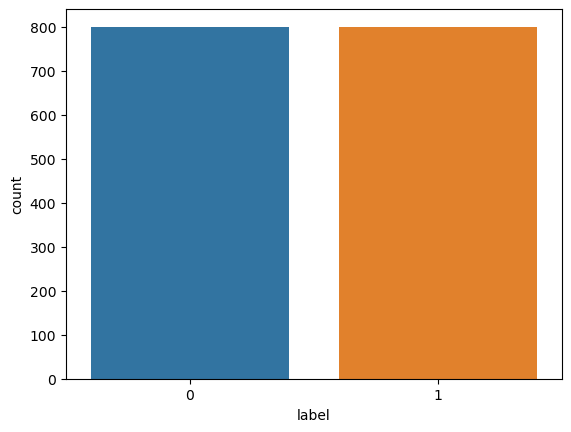

In [5]:
sn.countplot(x = df.label)

In [6]:
import nltk
import re
import string

def text_cleaning(text):
    """
    Preprocessing of text. 
    Lowercasing,
    remove links, 
    remove special characters,
    remove word containing numbers,
    """
    
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('\\W', ' ', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    
    return text

In [7]:
df.text = df.text.apply(text_cleaning)
df

,text,label
0,we stayed for a one night getaway with family ...,0
1,triple a rate with upgrade to view room was le...,0
2,this comes a little late as i m finally catchi...,0
3,the omni chicago really delivers on all fronts...,0
4,i asked for a high floor away from the elevato...,0
...,...,...
1595,problems started when i booked the intercontin...,1
1596,the amalfi hotel has a beautiful website and i...,1
1597,the intercontinental chicago magnificent mile ...,1
1598,the palmer house hilton while it looks good i...,1


In [11]:
import spacy
nlp = spacy.load("en_core_web_sm")

def text_preprocessing(text):
    doc = nlp(text)
    tokens = set()
    for token in doc:
        if not token.is_stop:
            tokens.add(token.lemma_)
    return ' '.join(tokens)

In [12]:
df.text = df.text.apply(text_preprocessing)
df

,text,label
0,good service night slow bose breakfast gorgeou...,0
1,river breakfast tribune shopping include vouch...,0
2,bother morning chicago forth bear usual stay ...,0
3,staff standard deliver helpful chicago separat...,0
4,get didn service equipped ask working pleasant...,0
...,...,...
1595,get let didn kind continue site conventioneer ...,1
1596,get well wife probably dali couldn enjoy inter...,1
1597,section account well accommodation pasta servi...,1
1598,pillow example good actually pay scoff smoke d...,1


In [8]:
X = df.text
y = df.label

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
v = TfidfVectorizer()
X = v.fit_transform(X)
print(X.shape)

(1600, 9276)


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state = 3,
                                                    test_size = 0.2
                                                   )

In [11]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

def print_results(y_test, y_pred):
    
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize = (5,4))
    sn.heatmap(cm, annot = True, fmt="d")
    plt.xlabel("Prediction")
    plt.ylabel("Target")
    
    print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.87      0.89       180
           1       0.84      0.91      0.87       140

    accuracy                           0.88       320
   macro avg       0.88      0.89      0.88       320
weighted avg       0.89      0.88      0.88       320



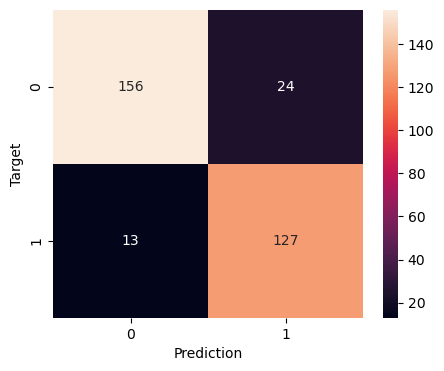

In [12]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print_results(y_test, y_pred)